In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [4]:
df = pd.read_excel('./17-red_neuronal/twitters.xlsx')

In [5]:
df.head()

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,13639734920,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,13640610350,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,13641168040,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,13641209670,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,13641526920,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...


In [6]:
df["targets"] = df["partido"].astype("category").cat.codes

In [7]:
K = df["targets"].max() + 1
K

5

In [8]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [10]:
# Convertir oraciones en secuencias
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['tweet'])
sequences_train = tokenizer.texts_to_sequences(df_train['tweet'])
sequences_test = tokenizer.texts_to_sequences(df_test['tweet'])

In [11]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'encontrado {V} tokens.')

encontrado 317653 tokens.


In [12]:
word2idx

{'de': 1,
 'la': 2,
 'y': 3,
 't': 4,
 'co': 5,
 'que': 6,
 'el': 7,
 'https': 8,
 'a': 9,
 'en': 10,
 'los': 11,
 'para': 12,
 'las': 13,
 'un': 14,
 'es': 15,
 'no': 16,
 'del': 17,
 'con': 18,
 'por': 19,
 'se': 20,
 'una': 21,
 'lo': 22,
 'al': 23,
 'más': 24,
 'su': 25,
 'gobierno': 26,
 'ha': 27,
 'españa': 28,
 'como': 29,
 'hoy': 30,
 'este': 31,
 'nos': 32,
 'todos': 33,
 'sus': 34,
 'esta': 35,
 'sánchez': 36,
 'pero': 37,
 'hay': 38,
 'todo': 39,
 'son': 40,
 'o': 41,
 'gracias': 42,
 'si': 43,
 'pp': 44,
 'psoe': 45,
 'nuestro': 46,
 'ya': 47,
 'contra': 48,
 'está': 49,
 'han': 50,
 'vox': 51,
 'madrid': 52,
 'desde': 53,
 'sobre': 54,
 'nuestra': 55,
 'ser': 56,
 'sin': 57,
 'ni': 58,
 'país': 59,
 'hemos': 60,
 'años': 61,
 'le': 62,
 'españoles': 63,
 'día': 64,
 'ley': 65,
 '👉': 66,
 'tiene': 67,
 'mi': 68,
 'estado': 69,
 'muy': 70,
 'porque': 71,
 'me': 72,
 'podemos': 73,
 '🌹': 74,
 'siempre': 75,
 'te': 76,
 'puede': 77,
 'hacer': 78,
 'política': 79,
 'derechos': 

In [13]:
# Rellenar las secuencias (Padding)
data_train = pad_sequences(sequences_train)
print('Dimensiones del tensor:', data_train.shape)

# Obtener la longitud de la secuencia
T = data_train.shape[1]

Dimensiones del tensor: (172053, 59)


In [14]:
T

59

In [15]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Dimensiones del tensor:', data_test.shape)

Dimensiones del tensor: (73737, 59)


In [16]:
D = 50 # dimensión del embedding

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) # El +1 se utiliza generalmente para incluir un token especial, como el token para palabras desconocidas
x = Conv1D(32, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

"""
Es una operación de reducción que extrae el valor máximo de las características en toda la secuencia.
Es útil para disminuir la dimensionalidad y para extraer la característica más importante de toda la secuencia.
Esto es particularmente útil en tareas de clasificación donde cada entrada completa puede ser clasificada solo con sus características más destacadas.
"""

x = Dense(K)(x)

model = Model(i, x)


In [18]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

print('Entrenando el modelo...')
r = model.fit(
    data_train,
    df_train['targets'],
    epochs=10,
    validation_data=(data_test, df_test['targets'])
)


Entrenando el modelo...
Epoch 1/10


5377/5377 ━━━━━━━━━━━━━━━━━━━━ 480s 89ms/step - accuracy: 0.6004 - loss: 1.0346 - val_accuracy: 0.6609 - val_loss: 0.8673
Epoch 2/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 478s 89ms/step - accuracy: 0.6866 - loss: 0.8106 - val_accuracy: 0.6689 - val_loss: 0.8487
Epoch 3/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 499s 93ms/step - accuracy: 0.7047 - loss: 0.7625 - val_accuracy: 0.6724 - val_loss: 0.8427
Epoch 4/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 506s 94ms/step - accuracy: 0.7203 - loss: 0.7244 - val_accuracy: 0.6725 - val_loss: 0.8468
Epoch 5/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 491s 91ms/step - accuracy: 0.7369 - loss: 0.6884 - val_accuracy: 0.6712 - val_loss: 0.8580
Epoch 6/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 495s 92ms/step - accuracy: 0.7495 - loss: 0.6577 - val_accuracy: 0.6703 - val_loss: 0.8698
Epoch 7/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 498s 93ms/step - accuracy: 0.7575 - loss: 0.6359 - val_accuracy: 0.6640 - val_loss: 0.8880
Epoch 8/10
5377/5377 ━━━━━━━━━━━━━━━━━━━━ 509s 95ms/step - accuracy: 0.7664 - lo

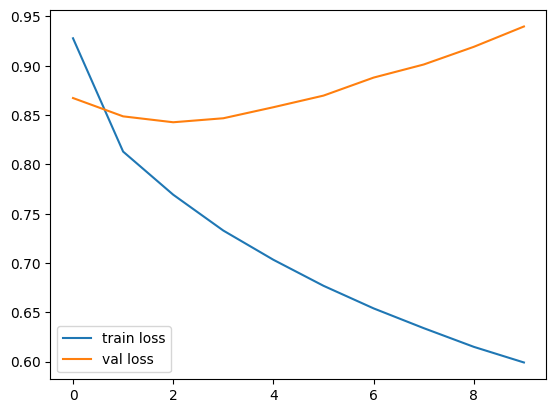

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

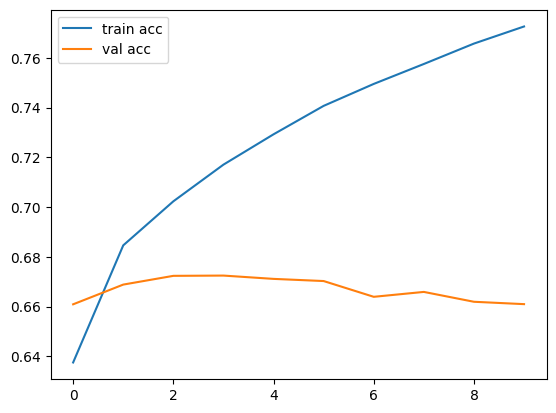

In [20]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [21]:
model.save('mi_modelo.h5')  # Guarda el modelo como un archivo HDF5

In [23]:
model.save_weights('mi_modelo_pesos.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=mi_modelo_pesos.h5

In [24]:
from keras.models import load_model
modelo_cargado = load_model('mi_modelo.h5')